In [54]:
from sklearn.svm import LinearSVC
import glob
import numpy as np
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
from cv_utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import os.path
from lane_utils import *

In [55]:
car_images = glob.glob('../data/vehicles/**/*.png')
non_car_images = glob.glob('../data/non-vehicles/**/*.png')

print ('Car Images dataset size:', len(car_images))
print ('Non-car Images dataset size:', len(non_car_images))

Car Images dataset size: 3425
Non-car Images dataset size: 3900


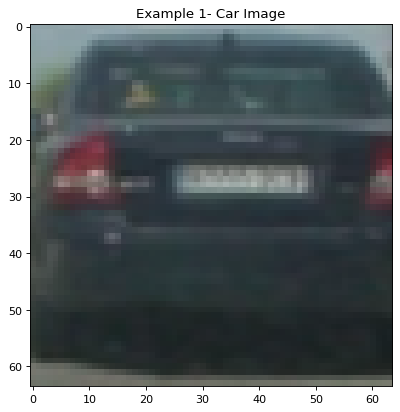

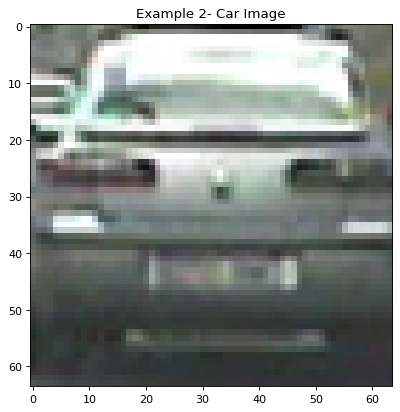

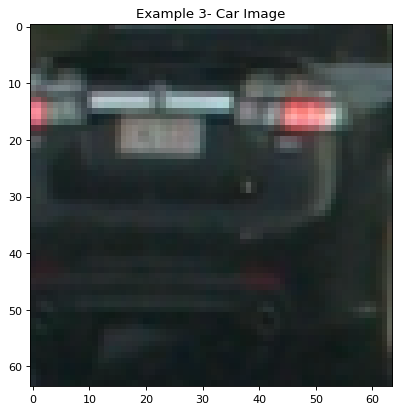

In [56]:
# 3 random examples of car images
for i in range(3):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(car_images))
    # Read in the image


    image = mpimg.imread(car_images[ind])

    # Plot the examples
    fig = plt.figure(figsize=(8, 6), dpi=80)
    plt.imshow(image, cmap='gray')
    plt.title('Example ' + str(i+1) + '- Car Image')

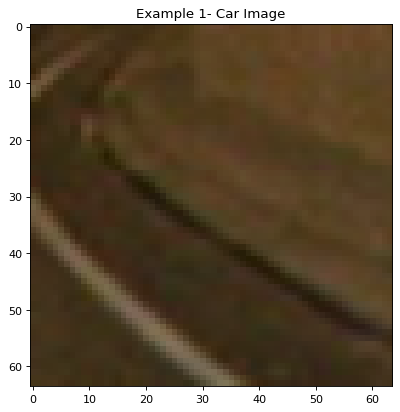

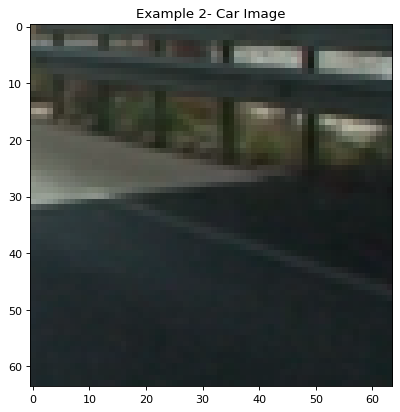

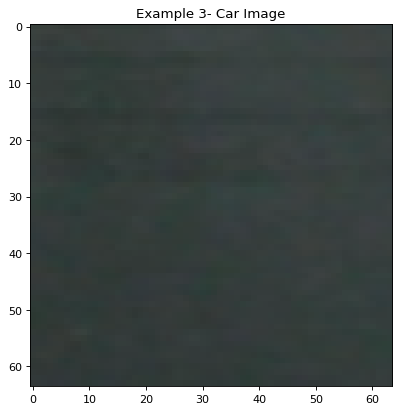

In [57]:
# 3 random examples of non car images
for i in range(3):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(non_car_images))
    # Read in the image


    image = mpimg.imread(non_car_images[ind])

    # Plot the examples
    fig = plt.figure(figsize=(8, 6), dpi=80)
    plt.imshow(image, cmap='gray')
    plt.title('Example ' + str(i+1) + '- Car Image')

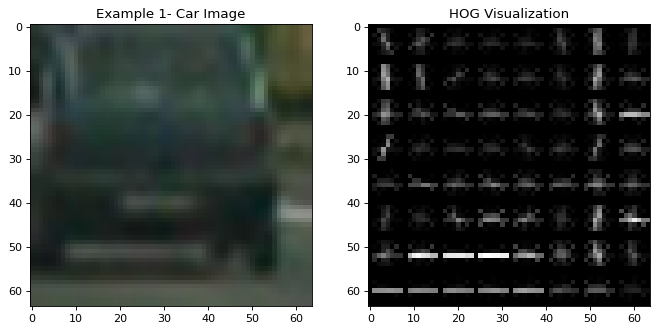

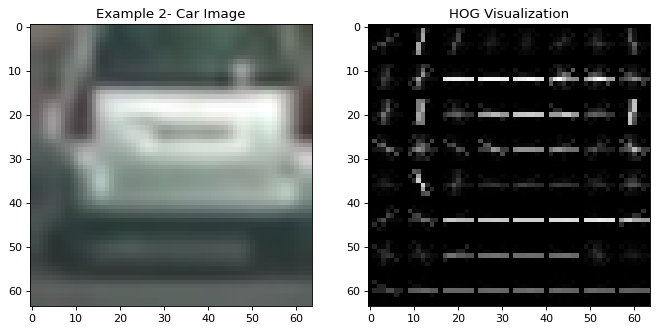

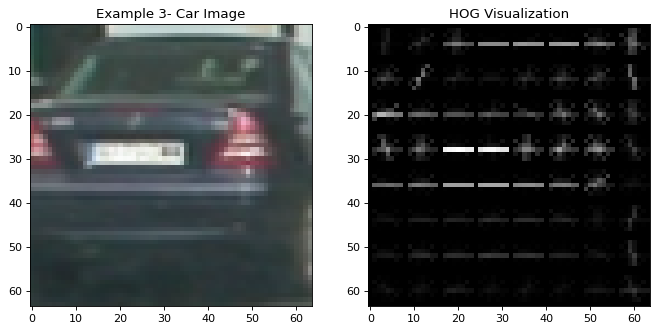

In [58]:
# 3 random examples of car images with HOG
for i in range(3):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(car_images))
    # Read in the image


    image = mpimg.imread(car_images[ind])

    feature_image = convert_color_space(image)

        
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(feature_image, orient=9, 
                            pix_per_cell= 8, cell_per_block= 2, 
                            vis=True, feature_vec=True)



    # Plot the examples
    fig = plt.figure(figsize=(10, 8), dpi=80)
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Example ' + str(i+1) + '- Car Image')
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')

Text(0.5, 1.0, 'Spatially binned features for a random car image')

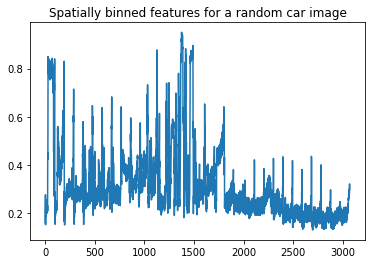

In [59]:
# Spatian Binning
feature_vec = bin_spatial(feature_image, size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially binned features for a random car image')

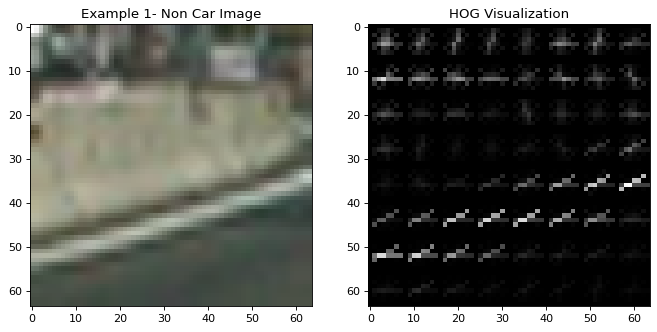

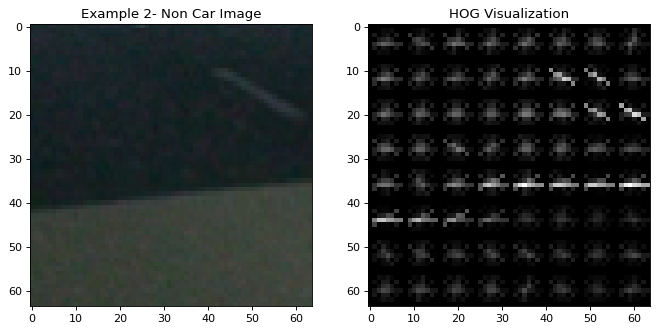

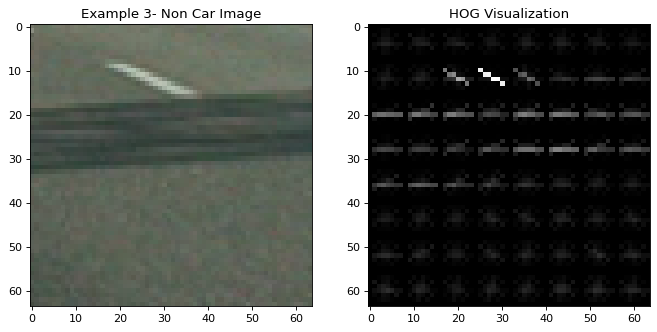

In [60]:
# 3 random examples of non car images
for i in range(3):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(non_car_images))
    # Read in the image


    image = mpimg.imread(non_car_images[ind])

    feature_image = convert_color_space(image)

        
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(feature_image, orient=9, 
                            pix_per_cell= 8, cell_per_block= 2, 
                            vis=True, feature_vec=True)



    # Plot the examples
    fig = plt.figure(figsize=(10, 8), dpi=80)
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Example ' + str(i+1) + '- Non Car Image')
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')

Text(0.5, 1.0, 'Spatially binned features for a random non car image')

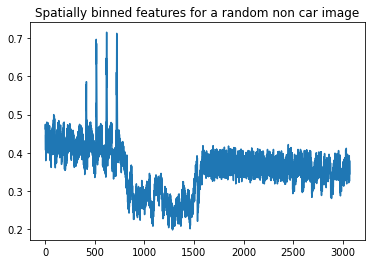

In [61]:
# Spatian Binning
feature_vec = bin_spatial(feature_image, size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially binned features for a random non car image')

In [62]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 700] # Min and max in y to search in slide_window()


# Extract hog and spatially binned features (combined)

In [63]:
import pickle 


if not os.path.exists('car_features.pkl'):
    car_features = get_image_features(car_images, 
                                      color_space=color_space, 
                                      orient=orient, 
                                      pix_per_cell=pix_per_cell,
                                      cell_per_block=cell_per_block,
                                      hog_channel=hog_channel,
                                      spatial_size=spatial_size,
                                      hist_bins=hist_bins, 
                                      spatial_feat=spatial_feat, 
                                      hist_feat=hist_feat,
                                      hog_feat=hog_feat)
    
    with open('car_features.pkl', 'wb') as pickle_file:
        pickle.dump(car_features, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)
else : 
    with open('car_features.pkl', 'rb') as pickle_load:
        car_features = pickle.load(pickle_load)
        


if not os.path.exists('not_car_features.pkl'):
    not_car_features = get_image_features(non_car_images, 
                                      color_space=color_space, 
                                      orient=orient, 
                                      pix_per_cell=pix_per_cell,
                                      cell_per_block=cell_per_block,
                                      hog_channel=hog_channel,
                                      spatial_size=spatial_size,
                                      hist_bins=hist_bins, 
                                      spatial_feat=spatial_feat, 
                                      hist_feat=hist_feat,
                                      hog_feat=hog_feat)



    with open('not_car_features.pkl', 'wb') as pickle_file:
        pickle.dump(not_car_features, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('not_car_features.pkl', 'rb') as pickle_load:
        not_car_features = pickle.load(pickle_load)

# Show Raw and Normalized Features

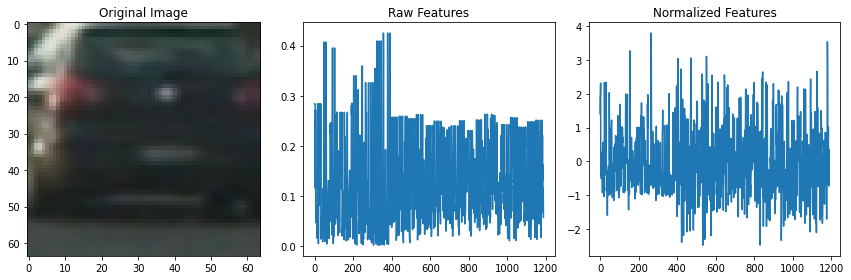

In [64]:
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, not_car_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(car_images))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(car_images[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

# Generate dataset and train the model

In [65]:
import joblib
if not os.path.exists('model.pkl'):
    # Create an array stack of feature vectors
    X = np.vstack((car_features, not_car_features)).astype(np.float64)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(not_car_features))))

    print(X.shape)
    print(y.shape)
    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=rand_state)

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X_train)
    # Apply the scaler to X
    X_train = X_scaler.transform(X_train)
    X_test = X_scaler.transform(X_test)

    print('Using:',orient,'orientations',pix_per_cell,
        'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))
    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    # Check the score of the SVC
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    # Check the prediction time for a single sample
    
    #save the model
    joblib.dump(svc, 'model.pkl') 
else:
    svc = joblib.load('model.pkl')

# Custom image example of find rectangles

In [66]:
from scipy.ndimage.measurements import label

image = mpimg.imread('../test_images/test01.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

ystart = 200
ystop = 656
scale = 1.5
    
rectangles = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)  

print(rectangles)

/Users/abbasihsna/learning/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


[((450, 344), (546, 440)), ((450, 440), (546, 536)), ((498, 296), (594, 392)), ((546, 536), (642, 632)), ((594, 296), (690, 392)), ((594, 392), (690, 488)), ((594, 488), (690, 584)), ((594, 536), (690, 632)), ((642, 248), (738, 344)), ((642, 536), (738, 632)), ((690, 248), (786, 344)), ((690, 296), (786, 392)), ((690, 392), (786, 488)), ((738, 248), (834, 344)), ((738, 440), (834, 536)), ((738, 536), (834, 632)), ((786, 200), (882, 296)), ((786, 248), (882, 344)), ((786, 440), (882, 536)), ((786, 488), (882, 584)), ((834, 200), (930, 296)), ((834, 248), (930, 344)), ((834, 296), (930, 392)), ((834, 392), (930, 488)), ((834, 536), (930, 632)), ((882, 248), (978, 344)), ((882, 392), (978, 488)), ((930, 200), (1026, 296)), ((930, 248), (1026, 344)), ((930, 296), (1026, 392)), ((930, 440), (1026, 536)), ((978, 296), (1074, 392)), ((978, 344), (1074, 440)), ((978, 392), (1074, 488)), ((978, 488), (1074, 584)), ((1026, 248), (1122, 344)), ((1026, 296), (1122, 392)), ((1026, 488), (1122, 584)

# Sliding Window Example

((450, 400), (1026, 976))
Number of boxes:  3


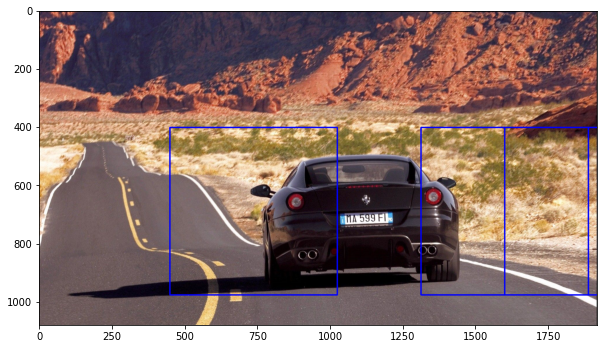

In [67]:
def draw_labeled_boxes(img, bboxes, thick):
    imcopy = np.copy(img)
    random_color = False
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], (0, 0, 255), thickness=thick)
    # Return the image copy with boxes drawn
    return imcopy

test_img = mpimg.imread('../test_images/test01.jpg')
rects = []

iter_list=[400,1000,9,100,200,10.0]


for i in range(0,len(iter_list)-3, 3):
    ystart = iter_list[i]
    ystop = iter_list[i+1]
    scale = iter_list[i+2]
    rectangle = find_cars(test_img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)  
    rects.append(rectangle)
        

rectangles = [item for sublist in rects for item in sublist] 
print(rectangles[0])
test_img_rects = draw_labeled_boxes(test_img, rectangles, thick=3)
plt.figure(figsize=(10,10))
plt.imshow(test_img_rects)
print('Number of boxes: ', len(rectangles))


((450, 200), (738, 488))
Number of boxes:  4


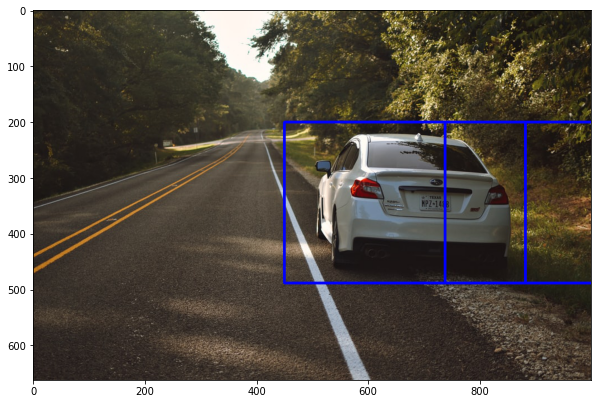

In [68]:
def draw_labeled_boxes(img, bboxes, thick):
    imcopy = np.copy(img)
    random_color = False
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], (0, 0, 255), thickness=thick)
    # Return the image copy with boxes drawn
    return imcopy

test_img = mpimg.imread('../test_images/test02.jpg')
rects = []

iter_list=[200,500,4.5,100,200,10.0]


for i in range(0,len(iter_list)-3, 3):
    ystart = iter_list[i]
    ystop = iter_list[i+1]
    scale = iter_list[i+2]
    rectangle = find_cars(test_img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)  
    rects.append(rectangle)
        

rectangles = [item for sublist in rects for item in sublist] 
print(rectangles[0])
test_img_rects = draw_labeled_boxes(test_img, rectangles, thick=3)
plt.figure(figsize=(10,10))
plt.imshow(test_img_rects)
print('Number of boxes: ', len(rectangles))


# Sliding window searches

/Users/abbasihsna/learning/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


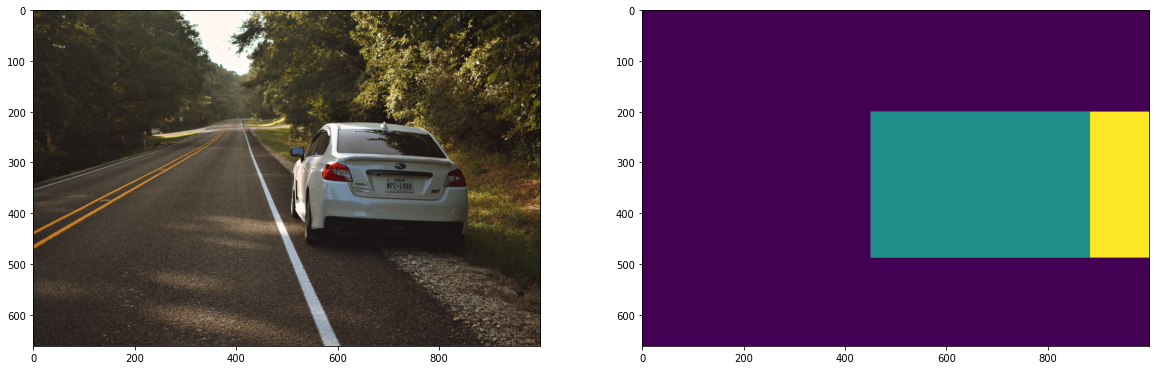

In [69]:
iter_list=[200,500,4.5, 450,990,8.5]
image = mpimg.imread('../test_images/test02.jpg')

#image = mpimg.imread('test.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

rectangles = []
for i in range(0,len(iter_list)-3, 3):
    ystart = iter_list[i]
    ystop = iter_list[i+1]
    scale = iter_list[i+2]
    recs = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)  
    rectangles+=(recs)

# Add heat to each box in box list
heat_add = add_heat(np.copy(heat),rectangles)

# Apply threshold to help remove false positives
heat_thresh = apply_threshold(heat_add,0)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(heat_thresh)




/Users/abbasihsna/learning/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


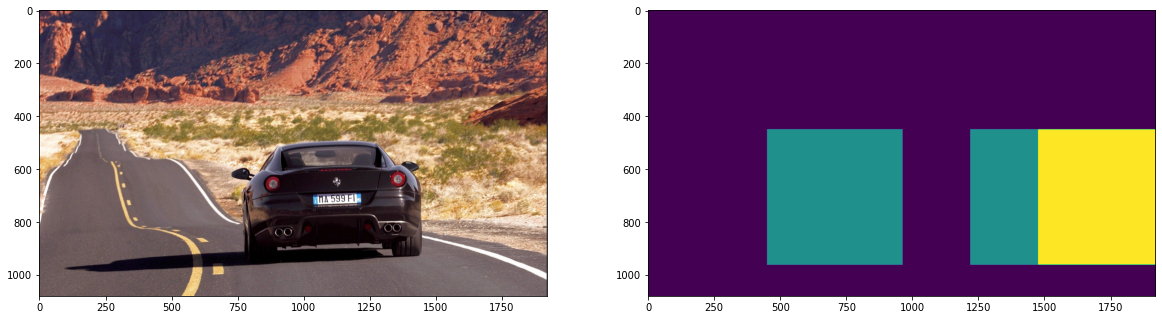

In [70]:
iter_list=[450,990,8,100,200,10.0]
image = mpimg.imread('../test_images/test01.jpg')

#image = mpimg.imread('test.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

rectangles = []
for i in range(0,len(iter_list)-3, 3):
    ystart = iter_list[i]
    ystop = iter_list[i+1]
    scale = iter_list[i+2]
    recs = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)  
    rectangles+=(recs)

# Add heat to each box in box list
heat_add = add_heat(np.copy(heat),rectangles)

# Apply threshold to help remove false positives
heat_thresh = apply_threshold(heat_add,0)


plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(heat_thresh)


